In [1]:
import sys, os, os.path
base = os.path.realpath("../../..")
heap = base + "/crsq-heap/src"
if (heap) not in sys.path:
    sys.path.append(heap)
    sys.path.append(base + "/crsq-arithmetic/src")
    sys.path.append(base + "/crsq-main/src")
print(sys.path)

['/home/hideo-t/work/py/crsq/crsq-heap/src', '/home/hideo-t/work/py/crsq/crsq-arithmetic/src', '/home/hideo-t/work/py/crsq/crsq-main/src', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/hideo-t/work/py/crsq/crsq-papers/2023/.env/lib/python3.10/site-packages']


In [2]:
import crsq.top.firstq as firstq
import math
import matplotlib.pyplot as plt
m = 3
M = 2**m
Ne = 1
Na = 1
Nsa = 0
d = 3
L=2
delta_t = 0.1
t3311 = firstq.FirstQIntegrator()
t3311.set_antisymmetrization_method(3)
t3311.set_dimension(d)
t3311.set_space_length(L)
t3311.set_coordinate_bits(m)
t3311.set_num_particles(Ne,Na,Nsa)
t3311.set_num_energy_configurations(1)
t3311.set_energy_configuration_weights([1])
t3311.set_max_particle_charge(1)
t3311.set_num_atom_iterations(1)
t3311.set_num_elec_per_atom_iterations(1)
t3311.set_use_spin(False)
t3311.set_delta_t(delta_t)
#t3111.set_calculate_nucleus_motion(False)
t3311.make_dummy_nuclei_data()
t3311.make_dummy_orbitals()
t3311.calculate_sizes()
t3311.allocate_registers()

t3311.build_circuit()

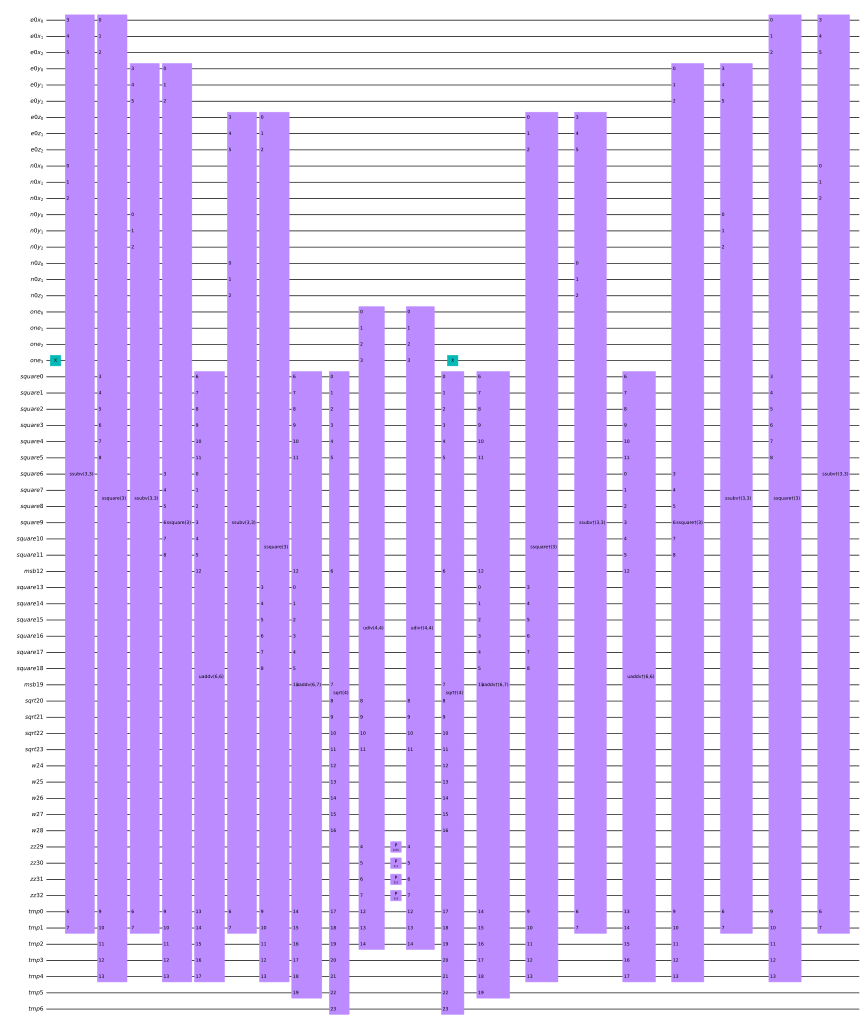

In [3]:
import matplotlib.pyplot as plt

dpi=300
qstyle={'name': 'clifford', 'dpi': dpi, 'fontsize': 18}

wr = [1, 4.4]
dpi=300
qstyle.update({'fontsize': 18, 'subfontsize': 16})
# fig, axs = plt.subplots(1,2, figsize=(7,6), width_ratios=wr, dpi=dpi, layout='constrained')  # , layout='constrained'

from crsq.blocks.hamiltonian import ElectronPotentialBlock, HamiltonianSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.discretization import DiscretizationSpec

L=2
wfr_spec = WaveFunctionRegisterSpec(3, 3, L, 1, 1, 0)
nuclei_data = [{ "mass": 1680, "charge": 1}]
ham_spec = HamiltonianSpec(wfr_spec, nuclei_data)
disc_spec = DiscretizationSpec(0.1)
epb = ElectronPotentialBlock(ham_spec, disc_spec)
epb1 = ElectronPotentialBlock(ham_spec, disc_spec, allocate=False)
epb1.set_ignore_local_regs(True)
epb1.allocate_registers()
epb1.invoke(epb.bind(eregs=epb1._eregs, nregs=epb1._nregs))
#epb1.circuit.draw(ax=axs[0], style=qstyle)

epb.circuit.draw(filename="paper_diagrams/H_ep.pair.3b3d1e1n.png", scale=0.35, fold=-1)
#fig.savefig('paper_diagrams/H_ep.pair.3b3d1e1n.png' )


In [4]:
import crsq.top.firstq as firstq
import math
import matplotlib.pyplot as plt
m = 3
M = 2**m
Ne = 1
Na = 1
Nsa = 0
d = 1
L=2
delta_t = 0.1
t3111 = firstq.FirstQIntegrator()
t3111.set_antisymmetrization_method(2)
t3111.set_dimension(d)
t3111.set_space_length(L)
t3111.set_coordinate_bits(m)
t3111.set_num_particles(Ne,Na,Nsa)
t3111.set_num_energy_configurations(1)
t3111.set_energy_configuration_weights([1])
t3111.set_max_particle_charge(1)
t3111.set_num_atom_iterations(1)
t3111.set_num_elec_per_atom_iterations(1)
t3111.set_use_spin(False)
t3111.set_delta_t(delta_t)
#t3111.set_calculate_nucleus_motion(False)
t3111.make_dummy_nuclei_data()
t3111.make_dummy_orbitals()
t3111.calculate_sizes()
t3111.allocate_registers()

t3111.build_circuit()

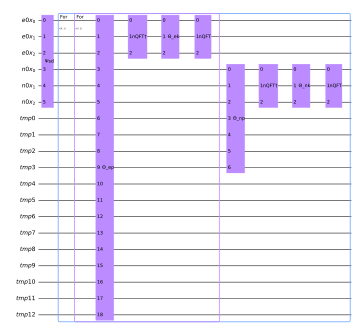

In [5]:
tev_block = t3111.build_time_evolution_block()
fig, ax = plt.subplots(figsize=(5.0,4.5), dpi=300, layout='constrained')
# tev_block.circuit.draw(filename='paper_diagrams/integrator-3b1d1e1n.png', ax=ax)
dpi=300
style_name='clifford'
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 18}

#tev_block.circuit.draw()
tev_block.circuit.draw(ax=ax, style=qstyle)
fig.savefig('paper_diagrams/integrator-3b1d1e1n.png')

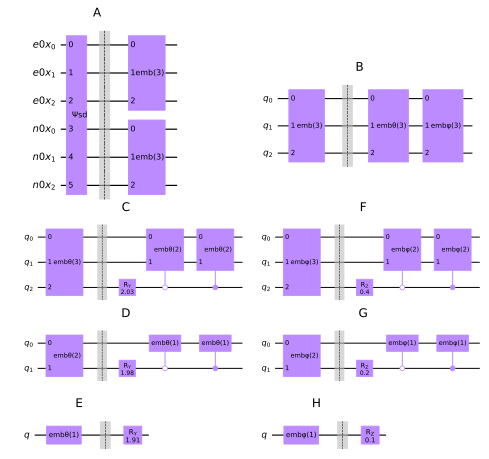

In [6]:
import math
import cmath
import matplotlib.pyplot as plt

from crsq.blocks.energy_initialization import GeneralStatePreparationBlock, EnergyConfigurationSpec
from crsq.blocks.energy_initialization import SlaterDeterminantPreparationBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec, make_test_elec_orbitals, make_test_nucl_orbitals
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec
from crsq.blocks.embed import StateEmbedGate, AmplitudeEmbedGate, PhaseEmbedGate

w = 7
h = 6.6
dpi=300
qstyle.update({'fontsize': 13, 'subfontsize': 12})
fig = plt.figure(figsize=(w,h), dpi=dpi)

u=1/w
v=1/h
x1=0
x2=3.3
x3=0
y1=0.6
y2=y1+1.3
y3=y2+1.8
sizes = [[0,y3,2.5,2.5], [3.3,y3,3.2,2.2],
         [0,y2,3.3,2],  [0,y1,3.3,2.0],  [0,0,2.0,1.0],
         [x2,y2,3.3,2], [x2,y1,3.3,2.0], [x2,0,2.0,1.0],
         ]
axs = []
for s in sizes:
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    axs.append(ax)

L=2
wfr_spec = WaveFunctionRegisterSpec(1, 3, L, 1, 1, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 2)

elec_orbital_data = make_test_elec_orbitals(wfr_spec, 1)
nuclei_orbital_data = make_test_nucl_orbitals(wfr_spec, 1)
ene_spec = EnergyConfigurationSpec([1], elec_orbital_data, nuclei_orbital_data)


bg2 = SlaterDeterminantPreparationBlock(ene_spec, asy_spec, 0, build=False)
sd = SlaterDeterminantPreparationBlock(ene_spec, asy_spec, 0)
bg2.invoke(sd.bind(eregs=bg2._e_index_regs, nregs=bg2._n_index_regs, bregs=bg2._sigma_regs, shuffle=bg2._shuffle_ancilla))
bg2.circuit.barrier()
bg2.build_circuit()
ax=axs[0]
bg2.circuit.draw(ax=ax, style=qstyle)
ax.set_title('A')

from qiskit import QuantumCircuit, QuantumRegister
import crsq.utils.setdistribution as sdist

pn = range(1,9) # unnormalized probabilities
an = [math.sqrt(p)*cmath.exp(0.1j*p) for p in pn]
#an = [1 for p in pn]

squares = [t*t.conjugate() for t in an]
phases = [cmath.phase(t) for t in an]
bg = StateEmbedGate(an, build=False)
emb_gate = StateEmbedGate(an)
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax=axs[1]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('B')


#pn = [1,2,3,4] # unnormalized probabilities
#an = [math.sqrt(p) for p in pn]
bg = AmplitudeEmbedGate(an, build=False)
emb_gate = AmplitudeEmbedGate(an)
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax = axs[2]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('C')

n=4
bg = AmplitudeEmbedGate(an[:n], build=False)
emb_gate = AmplitudeEmbedGate(an[:n])
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax = axs[3]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('D')


n=2
bg = AmplitudeEmbedGate(an[:n], build=False)
emb_gate = AmplitudeEmbedGate(an[:n])
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax = axs[4]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('E')


bg = PhaseEmbedGate(an, build=False)
emb_gate = PhaseEmbedGate(an)
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax = axs[5]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('F')

n=4
bg = PhaseEmbedGate(an[:n], build=False)
emb_gate = PhaseEmbedGate(an[:n])
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax = axs[6]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('G')


n=2
bg = PhaseEmbedGate(an[:n], build=False)
emb_gate = PhaseEmbedGate(an[:n])
bg.invoke(emb_gate.bind(q=bg._qreg))
bg.circuit.barrier()
bg.build_circuit()

ax = axs[7]
bg.circuit.draw(ax=ax, style=qstyle)
ax.set_title('H')


fig.savefig("paper_diagrams/eneini-3b1d1e1n.png")


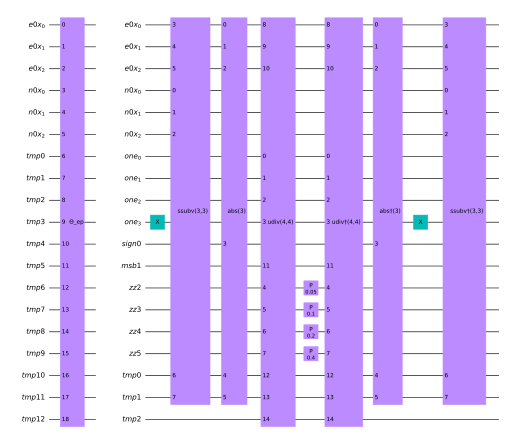

In [7]:
import matplotlib.pyplot as plt


wr = [1, 4.4]
dpi=300
qstyle.update({'fontsize': 18, 'subfontsize': 16})
fig, axs = plt.subplots(1,2, figsize=(7,6), width_ratios=wr, dpi=dpi, layout='constrained')  # , layout='constrained'

from crsq.blocks.hamiltonian import ElectronPotentialBlock, HamiltonianSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.discretization import DiscretizationSpec

L=2
wfr_spec = WaveFunctionRegisterSpec(1, 3, L, 1, 1, 0)
nuclei_data = [{ "mass": 1680, "charge": 1}]
ham_spec = HamiltonianSpec(wfr_spec, nuclei_data)
disc_spec = DiscretizationSpec(0.1)
epb = ElectronPotentialBlock(ham_spec, disc_spec)
epb1 = ElectronPotentialBlock(ham_spec, disc_spec, allocate=False)
epb1.set_ignore_local_regs(True)
epb1.allocate_registers()
epb1.invoke(epb.bind(eregs=epb1._eregs, nregs=epb1._nregs))
epb1.circuit.draw(ax=axs[0], style=qstyle)

epb.circuit.draw(ax=axs[1], style=qstyle)
fig.savefig('paper_diagrams/H_ep.pair.3b1d1e1n.png' )


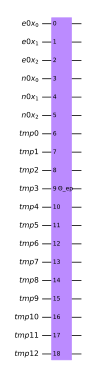

In [8]:
from crsq.blocks.hamiltonian import ElectronPotentialBlock, HamiltonianSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.discretization import DiscretizationSpec
L=2
wfr_spec = WaveFunctionRegisterSpec(1, 3, L, 1, 1, 0, use_spin=False)
nuclei_data = [{ "mass": 1680, "charge": 1}]
ham_spec = HamiltonianSpec(wfr_spec, nuclei_data)
disc_spec = DiscretizationSpec(0.1)
epb = ElectronPotentialBlock(ham_spec, disc_spec)
epb1 = ElectronPotentialBlock(ham_spec, disc_spec, allocate=False)
epb1.set_ignore_local_regs(True)
epb1.allocate_registers()
epb1.invoke(epb.bind(eregs=epb1._eregs, nregs=epb1._nregs))
#epb1.circuit.draw(filename='paper_diagrams/H_ep.ext.3b1d1e1n.png', scale=0.4)
qstyle.update({'fontsize': 15, 'subfontsize': 13})
epb1.circuit.draw(scale=0.4,style=qstyle)


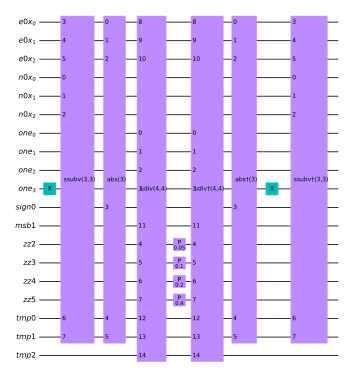

In [9]:
epb.circuit.draw(filename='paper_diagrams/H_ep.int.3b1d1e1n.png', style=qstyle, scale=0.4, fold=-1)

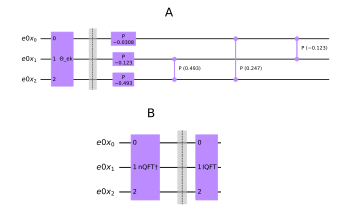

In [10]:
import matplotlib.pyplot as plt
from crsq.blocks.hamiltonian import HamiltonianSpec, ElectronKineticBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.qft import QFTOnWaveFunctionsBlock

# ratio = [1, 1]
# dpi=300
# qstyle={'name': 'default', 'dpi': dpi, 'fontsize': 13, 'subfontsize': 8}
# fig, axs = plt.subplots(2,1, figsize=(5,4), height_ratios=ratio, dpi=dpi, layout='constrained')  # , layout='constrained'

w = 5
h = 3.3
dpi=300
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 13, 'subfontsize': 12}
#qstyle.update({'fontsize': 13, 'subfontsize': 10})
fig = plt.figure(figsize=(w,h), dpi=dpi)

u=1/w
v=1/h
sizes = [[0,1.3,4.5,2], [1,-0.2,2,2]]
axs = []
for s in sizes:
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    axs.append(ax)

from crsq.blocks.discretization import DiscretizationSpec
L=2
wfr_spec = WaveFunctionRegisterSpec(1, 3, L, 1, 1, 0, use_spin=False)
nuclei_data = [{ "mass": 1680, "charge": 1}]
ham_spec = HamiltonianSpec(wfr_spec, nuclei_data)
disc_spec = DiscretizationSpec(0.1)

bg = ElectronKineticBlock(wfr_spec, disc_spec, build=False)
block = ElectronKineticBlock(wfr_spec, disc_spec)
bg.invoke(block.bind(eregs=bg._eregs))
bg.circuit.barrier()
bg.build_circuit()
bg.circuit.draw(ax=axs[0],style=qstyle)
axs[0].set_title('A')

bg = QFTOnWaveFunctionsBlock(wfr_spec, on_electrons=True, inverse=True, build=False)
block = QFTOnWaveFunctionsBlock(wfr_spec, on_electrons=True, inverse=True)
bg.invoke(block.bind(eregs=bg._eregs, nregs=bg._nregs), invoke_as_instruction=True)
bg.circuit.barrier()
bg.build_circuit()
bg.circuit.draw(ax=axs[1],style=qstyle)
axs[1].set_title('B')
fig.savefig('paper_diagrams/H_ek.FFTdag.png')

In [11]:
import crsq.top.firstq as firstq
import math
m = 2
M = 2**m
Ne = 1
Na = 1
Nsa = 0
d = 2
L=2
delta_t = 0.1
t3211 = firstq.FirstQIntegrator()
t3211.set_dimension(d)
t3211.set_space_length(L)
t3211.set_coordinate_bits(m)
t3211.set_num_particles(Ne, Na, Nsa)
t3211.set_num_energy_configurations(1)
t3211.set_energy_configuration_weights([1])
t3211.set_max_particle_charge(1)
t3211.set_num_atom_iterations(1)
t3211.set_num_elec_per_atom_iterations(1)
t3211.set_delta_t(delta_t)
t3211.set_calculate_nucleus_motion(False)
t3211.make_dummy_orbitals()
t3211.make_dummy_nuclei_data()
t3211.set_revert_potential_ancilla_value(False)

t3211.calculate_sizes()
t3211.allocate_registers()
t3211.build_circuit()

In [12]:
tev_block = t3211.build_time_evolution_block()
#tev_block.circuit.draw(filename='paper_diagrams/integrator-3b2d1e1n.png', scale=0.6)
#tev_block.circuit.draw(scale=0.6)

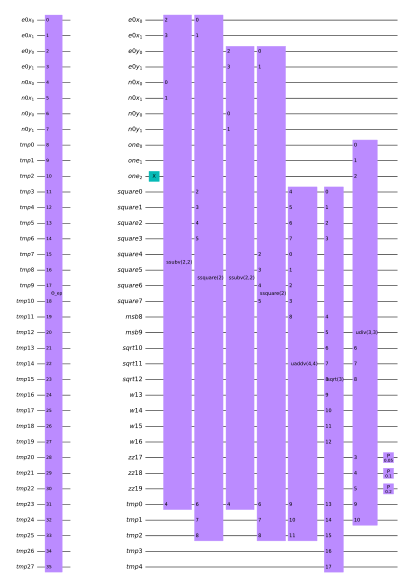

In [13]:
import matplotlib.pyplot as plt
wr = [1., 5]
qstyle.update({'fontsize': 18, 'subfontsize': 15})
fig, axs = plt.subplots(1,2, figsize=(6,8), width_ratios=wr, dpi=dpi, layout='constrained')  # , layout='constrained'


# tev_block = t3211.build_time_evolution_block()
# tev_block.circuit.draw(ax=axs[0])


block = t3211.build_elec_potential_block()
block1 = t3211.build_elec_potential_block(allocate=False, build=False)
block1.set_ignore_local_regs(True)
block1.allocate_registers()
block1.invoke(block.bind(eregs=block1._eregs, nregs=block1._nregs))
block1.circuit.draw(ax=axs[0], style=qstyle)


epblock = t3211.build_elec_potential_block()
epblock.circuit.draw(ax=axs[1], style=qstyle, fold=-1)

fig.savefig('paper_diagrams/Θep.pair.2b2d1e1n.png')

In [14]:
block = t3211.build_elec_potential_block()
block1 = t3211.build_elec_potential_block(allocate=False, build=False)
block1.set_ignore_local_regs(True)
block1.allocate_registers()
block1.invoke(block.bind(eregs=block1._eregs, nregs=block1._nregs))
# block1.circuit.draw(scale=0.4)
# block1.circuit.draw(filename='paper_diagrams/Ve.gate-3b2d1e1n.png', scale=0.4, fold=-1)

In [15]:
epblock = t3211.build_elec_potential_block()
#epblock.circuit.draw(filename='paper_diagrams/Ve.inst-3b2d1e1n.png', scale=0.4, fold=-1)

In [16]:
import crsq.top.firstq as firstq
import math
m = 2
M = 2**m
Ne = 4
Na = 1
Nsa = 0
d = 1
L=2
delta_t = 0.1
t1141 = firstq.FirstQIntegrator()
t1141.set_dimension(d)
t1141.set_space_length(L)
t1141.set_coordinate_bits(m)
t1141.set_num_particles(Ne,Na,Nsa)
t1141.set_num_energy_configurations(1)
t1141.set_energy_configuration_weights([1])
t1141.set_max_particle_charge(1)
t1141.set_num_atom_iterations(1)
t1141.set_num_elec_per_atom_iterations(1)
t1141.set_delta_t(delta_t)
t1141.set_antisymmetrization_method(2)
#t1141.set_calculate_nucleus_motion(False)
t1141.make_dummy_orbitals()
t1141.make_dummy_nuclei_data()

t1141.calculate_sizes()
t1141.allocate_registers()

t1141.set_revert_potential_ancilla_value(True)
t1141.set_calculate_potential_term(True)

t1141.build_circuit()

saved to  paper_diagrams/integrator-2b1d4e1n.png


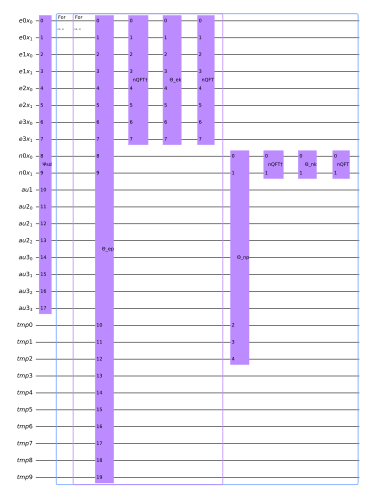

In [17]:
qstyle.update({'fontsize': 18, 'subfontsize': 8})
fig, ax = plt.subplots(figsize=(5.0,7), dpi=dpi, layout='constrained')
# tev_block.circuit.draw(filename='paper_diagrams/integrator-3b1d1e1n.png', ax=ax)
block = t1141.build_time_evolution_block()
block.circuit.draw(ax=ax,style=qstyle)
fn = f'paper_diagrams/integrator-{m}b{d}d{Ne}e{Na}n.png'
fig.savefig(fn)
print("saved to ", fn)

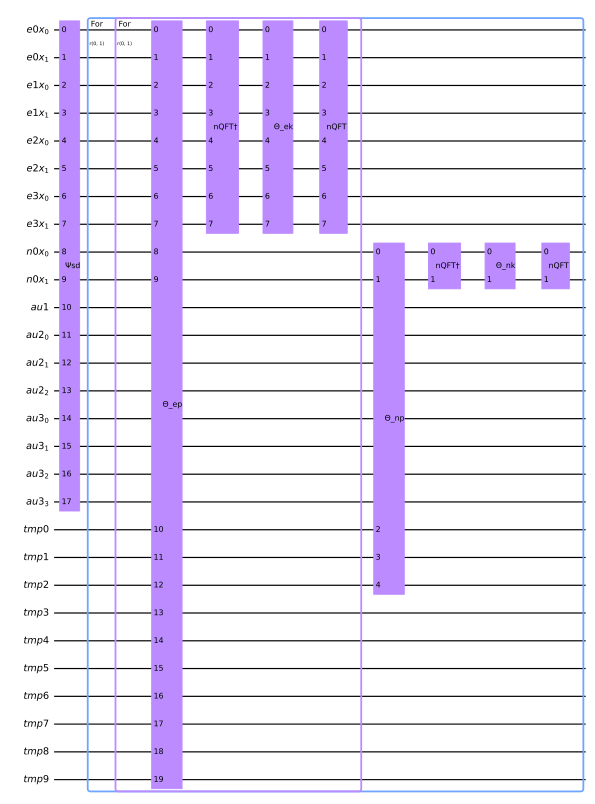

In [18]:
block = t1141.build_time_evolution_block()
# block.circuit.draw(filename=f'paper_diagrams/integrator-{m}b{d}d{Ne}e{Na}n.png', scale=0.6)
block.circuit.draw(scale=0.6)

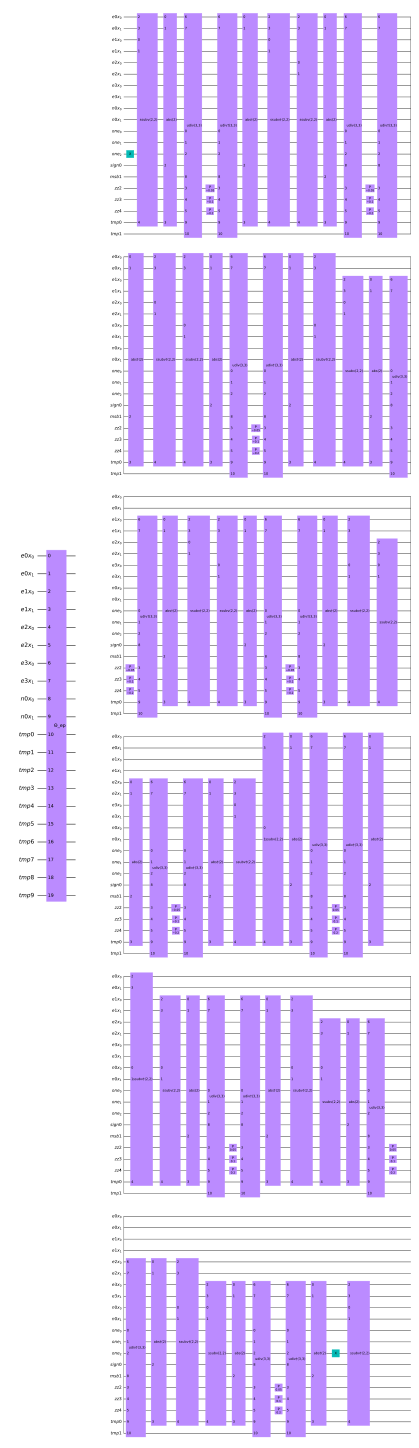

In [19]:
import matplotlib.pyplot as plt
wr = [1., 5]
qstyle.update({'fontsize': 18, 'subfontsize': 15})
fig, axs = plt.subplots(1,2, figsize=(6,20), width_ratios=wr, dpi=dpi, layout='constrained')  # , layout='constrained'


# tev_block = t3211.build_time_evolution_block()
# tev_block.circuit.draw(ax=axs[0])


block = t1141.build_elec_potential_block()
block1 = t1141.build_elec_potential_block(allocate=False, build=False)
block1.set_ignore_local_regs(True)
block1.allocate_registers()
block1.invoke(block.bind(eregs=block1._eregs, nregs=block1._nregs))
block1.circuit.draw(ax=axs[0], style=qstyle)


epblock = t1141.build_elec_potential_block()
epblock.circuit.draw(ax=axs[1], style=qstyle)

fig.savefig('paper_diagrams/Θep.pair.2b1d4e1n.png')

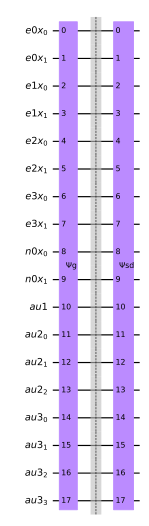

In [20]:
from crsq.blocks.energy_initialization import GeneralStatePreparationBlock, EnergyConfigurationSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec, make_test_elec_orbitals, make_test_nucl_orbitals
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec

m=2
d=1
Ne=4
Na=1
Nsa=0
wfr_spec = WaveFunctionRegisterSpec(d, m, L, Ne, Na, Nsa)
asy_spec = AntisymmetrizationSpec(wfr_spec, 2)
e_orbitals = make_test_elec_orbitals(wfr_spec, 1)
n_orbitals = make_test_nucl_orbitals(wfr_spec, 1)
ene_spec = EnergyConfigurationSpec([1], e_orbitals, n_orbitals)
hfs = GeneralStatePreparationBlock(ene_spec, asy_spec)
hfs1 = GeneralStatePreparationBlock(ene_spec, asy_spec, build=False)
hfs1.invoke(hfs.bind(eregs=hfs1._eregs, nregs=hfs1._nregs, bregs=hfs1._sigma_regs,
                     shuffle=hfs1._shuffle_ancilla, p=hfs1._p_reg))
hfs1.circuit.barrier()

hfs1.build_circuit()
qstyle.update({'fontsize': 13, 'subfontsize': 10})
hfs1.circuit.draw(filename=f'paper_diagrams/ΣΨk-{m}b{d}d{Ne}e{Na}n.png', style=qstyle, scale=0.6)

paper_diagrams/Ψsd-2b1d4e1n.png


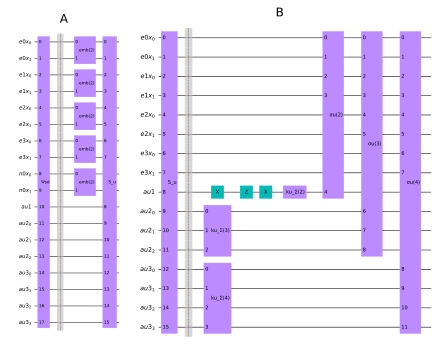

In [21]:
# tev_block.circuit.draw(filename='paper_diagrams/integrator-3b1d1e1n.png', ax=ax)
block = t1141.build_time_evolution_block()
block.circuit.draw(ax=ax,style=qstyle)
fn = f'paper_diagrams/integrator-{m}b{d}d{Ne}e{Na}n.png'

from crsq.blocks.energy_initialization import SlaterDeterminantPreparationBlock, EnergyConfigurationSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec, make_test_elec_orbitals, make_test_nucl_orbitals
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec, UnaryCodedPermutationBlock

wr = [1, 2.7]
qstyle.update({'fontsize': 18, 'subfontsize': 13})
fig, axs = plt.subplots(1,2, figsize=(6,5), width_ratios=wr, dpi=dpi, layout='constrained') 

m=2
d=1
L=2
Ne=4
Na=1
wfr_spec = WaveFunctionRegisterSpec(d, m, L, Ne, Na, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 2)
e_orbitals = make_test_elec_orbitals(wfr_spec, 1)
n_orbitals = make_test_nucl_orbitals(wfr_spec, 1)
ene_spec = EnergyConfigurationSpec([1], e_orbitals, n_orbitals)
ssi = SlaterDeterminantPreparationBlock(ene_spec, asy_spec, 0)
ssi1 = SlaterDeterminantPreparationBlock(ene_spec, asy_spec, 0, build=False)
ssi1.invoke(ssi.bind(eregs=ssi1._e_index_regs, nregs=ssi1._n_index_regs, bregs=ssi1._sigma_regs,
                     shuffle=ssi1._shuffle_ancilla))
ssi1.circuit.barrier()

ssi1.build_circuit()

ssi1.circuit.draw(ax=axs[0], style=qstyle)
axs[0].set_title('A')

hfs = UnaryCodedPermutationBlock(asy_spec)
hfs1 = UnaryCodedPermutationBlock(asy_spec, build=False)
hfs1.invoke(hfs.bind(aregs=hfs1._aregs, eregs=hfs1._eregs))
hfs1.circuit.barrier()

hfs1.build_circuit()
hfs1.circuit.draw(ax=axs[1], style=qstyle)
axs[1].set_title('B')

fn=f'paper_diagrams/Ψsd-{m}b{d}d{Ne}e{Na}n.png'
print(fn)
fig.savefig(fn)


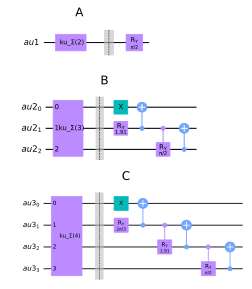

In [22]:
w = 3.3
h = 4.2
dpi=300
fig = plt.figure(figsize=(w,h), dpi=dpi)

qstyle.update({'fontsize': 13, 'subfontsize': 10})
u=1/w
v=1/h
x1=0
x2=3
x3=0
y1=2
y2=y1+1.2
sizes = [[-0.1,y2,2,1], [-0.4,y1,3.3,1], [-0.1,0,3.3,2]]
axs = []
for i, s in enumerate(sizes):
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    ax.set_title('ABCDEFGH'[i])
    axs.append(ax)


from crsq.blocks.antisymmetrization import UnaryCodedSequenceBlock
from qiskit_aer import AerSimulator
from qiskit import transpile
backend = AerSimulator()

for i, eta in enumerate(range(2,5)):
    lcb = UnaryCodedSequenceBlock(eta)
    lcb1 = UnaryCodedSequenceBlock(eta, build=False)
    lcb1.invoke(lcb.bind(areg=lcb1._areg))
    lcb1.circuit.barrier()
    lcb1.build_circuit()
    lcb1.circuit.draw(ax=axs[i], style=qstyle)

fn='paper_diagrams/k_Σ(2,3,4).png'
fig.savefig(fn)


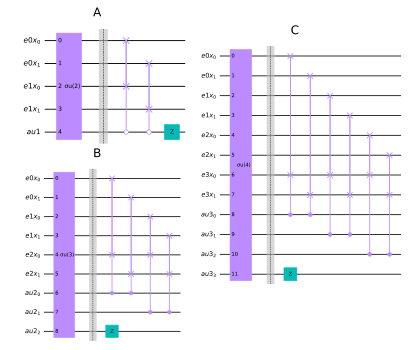

In [23]:
w = 5.8
h = 4.8
fig = plt.figure(figsize=(w,h),dpi=dpi)

qstyle.update({'fontsize': 18})
u=1/w
v=1/h
#sizes = [[x3,y2,3.2,2.2], [x3,y1,3.3,1], [x3,0,1.9,1.0]]
sizes = [[0, 2.6, 2.5, 2], [0,0,2.5,2.5], [2.5,0.5,3,4]]
axs = []
for i, s in enumerate(sizes):
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    ax.set_title('ABCDEFGH'[i])
    axs.append(ax)

from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.antisymmetrization import UnaryCodedShuffleBlock
wfrspec=WaveFunctionRegisterSpec(1,2,L,4,0,0)
n=wfrspec.num_coordinate_bits
Ne=wfrspec.num_electrons

for i, eta in enumerate(range(2,5)):
    ush = UnaryCodedShuffleBlock(wfrspec, eta, build=False)
    ush2 = UnaryCodedShuffleBlock(wfrspec, eta)
    ush.invoke(ush2.bind(areg=ush._areg, eregs=ush._eregs))
    ush.circuit.barrier()
    ush.build_circuit()
    ush.circuit.draw(ax=axs[i])

filename=f'paper_diagrams/σu(2,3,4).png'
fig.savefig(filename)


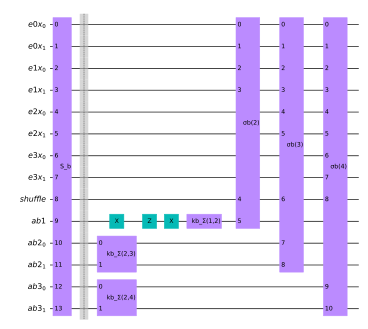

In [24]:
fig, ax = plt.subplots(figsize=(5,4.5), dpi=dpi,layout='constrained')

from crsq.blocks.antisymmetrization import BinaryCodedPermutationBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec

m=2
d=1
Ne=4
Na=1
wfr_spec = WaveFunctionRegisterSpec(d, m, L, Ne, Na, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 3)

hfb = BinaryCodedPermutationBlock(asy_spec)
hfb1 = BinaryCodedPermutationBlock(asy_spec, build=False)
hfb1.invoke(hfb.bind(aregs=hfb1._aregs, swap=hfb1._ancilla_reg, eregs=hfb1._eregs))
hfb1.circuit.barrier()

hfb1.build_circuit()
hfb1.circuit.draw(ax=ax,style=qstyle)

filename=f'paper_diagrams/S_b.png'
fig.savefig(filename)


In [25]:

from crsq.blocks.antisymmetrization import BinaryCodedPermutationBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec

m=2
d=1
Ne=4
Na=1
wfr_spec = WaveFunctionRegisterSpec(d, m, L, Ne, Na, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 3)

hfb = BinaryCodedPermutationBlock(asy_spec)
hfb1 = BinaryCodedPermutationBlock(asy_spec, build=False)
hfb1.invoke(hfb.bind(aregs=hfb1._aregs, swap=hfb1._ancilla_reg, eregs=hfb1._eregs))
hfb1.circuit.barrier()

hfb1.build_circuit()
# hfb1.circuit.draw(filename=f'paper_diagrams/HF_binary.png', scale=0.6)

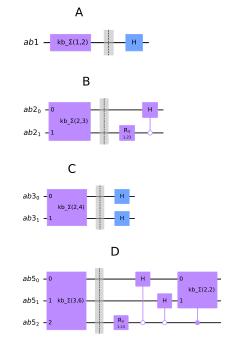

In [26]:
w = 3.3
h = 5.0
dpi=300
fig = plt.figure(figsize=(w,h),dpi=dpi)

qstyle.update({'fontsize': 13})
u=1/w
v=1/h
x=0
y1=1.3
y2=y1+1.2
y3=y2+1.1
sizes = [[x,y3,2.0,1.5], [x,y2,2.2,1.5], [x,y1,1.8,1.5], [x,0,3,1.5]]
axs = []
for i, s in enumerate(sizes):
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    ax.set_title('ABCDEFGH'[i])
    axs.append(ax)


from crsq.blocks.antisymmetrization import BinaryCodedSequenceBlock

bcircs = []
for i, N in enumerate([2,3,4,6]):
    num_bits = math.ceil(math.log2(N))
    blcb = BinaryCodedSequenceBlock(num_bits, N)
    blcb1 = BinaryCodedSequenceBlock(num_bits, N, build = False)
    blcb1.invoke(blcb.bind(areg=blcb1._areg))
    blcb1.circuit.barrier()
    blcb1.build_circuit()
    blcb1.circuit.draw(ax=axs[i])

filename=f'paper_diagrams/kb_Σ(2,3,4,6).png'
fig.savefig(filename)


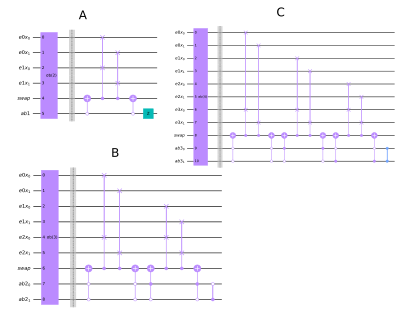

In [27]:
w = 5.5
h = 4.5
fig = plt.figure(figsize=(w,h),dpi=dpi)

qstyle.update({'fontsize': 15})
u=1/w
v=1/h
#sizes = [[x3,y2,3.2,2.2], [x3,y1,3.3,1], [x3,0,1.9,1.0]]
sizes = [[0, 2.5, 2.1, 2], [0,0,3,2.5], [2.2,1.2,3.2,4]]
axs = []
for i, s in enumerate(sizes):
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    ax.set_title('ABCDEFGH'[i])
    axs.append(ax)

from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.antisymmetrization import BinaryCodedShuffleBlock
wfrspec=WaveFunctionRegisterSpec(1,2,L,4,0,0)
n=wfrspec.num_coordinate_bits
Ne=wfrspec.num_electrons
p = []
for i, eta in enumerate([2,3,4]):
    bsh = BinaryCodedShuffleBlock(wfrspec, eta, build=False)
    bsh2 = BinaryCodedShuffleBlock(wfrspec, eta)
    bsh.invoke(bsh2.bind(areg=bsh._areg, swap=bsh._swap_ancilla_reg, eregs=bsh._eregs))
    bsh.circuit.barrier()
    bsh.build_circuit()
    bsh.circuit.draw(ax=axs[i])

filename=f'paper_diagrams/σb(2,3,4).png'
fig.savefig(filename)

In [28]:
import crsq.top.firstq as firstq
import math
m = 2
M = 2**m
Ne = 2
Na = 1
d = 1
L=2
delta_t = 0.1
tm1121 = firstq.FirstQIntegrator()
tm1121.set_dimension(d)
tm1121.set_space_length(L)
tm1121.set_coordinate_bits(m)
tm1121.set_num_particles(Ne,Na,0)
tm1121.set_num_energy_configurations(4)
tm1121.set_energy_configuration_weights([.4,.3,.2,.1])
tm1121.set_max_particle_charge(1)
tm1121.set_num_atom_iterations(1)
tm1121.set_num_elec_per_atom_iterations(1)
tm1121.set_delta_t(delta_t)
tm1121.make_dummy_orbitals()
tm1121.make_dummy_nuclei_data()

tm1121.calculate_sizes()
tm1121.allocate_registers()

tm1121.build_circuit()

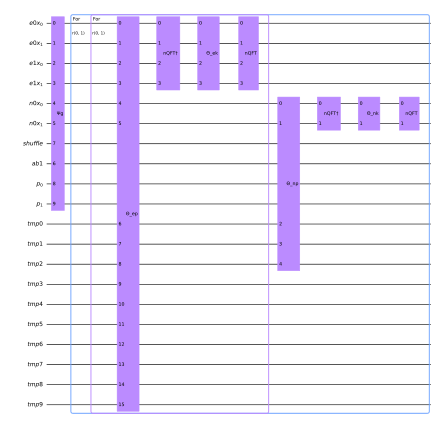

In [29]:
dpi=300
qstyle.update({'fontsize': 15, 'subfontsize': 13})
fig, ax = plt.subplots(figsize=(6,6), dpi=dpi, layout='constrained')

tev = tm1121.build_time_evolution_block()
tev.circuit.draw(ax=ax, style=qstyle)
filename='paper_diagrams/integrator-4C2b1d2e1n.png'
fig.savefig(filename)


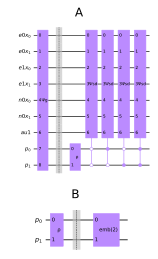

In [30]:
dpi=300
qstyle={'name': style_name, 'dpi': dpi, 'fontsize': 13, 'subfontsize': 8}
# fig, ax = plt.subplots(figsize=(3.3,4.5), dpi=dpi, layout='constrained')

qstyle.update({'fontsize': 13, 'subfontsize': 8})

w=2.5
h=3.7
fig = plt.figure(figsize=(w,h),dpi=dpi)
u=1/w
v=1/h

sizes = [[0, 0.8, 2, 3], [0.2, 0, 1.5, 1]]
axs = []
for i, s in enumerate(sizes):
    ss = (s[0]*u, s[1]*v, s[2]*u, s[3]*v)
    ax = fig.add_axes(ss)
    ax.set_title('ABCDEFGH'[i])
    axs.append(ax)



from crsq.blocks.energy_initialization import GeneralStatePreparationBlock, EnergyConfigurationSpec
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec, make_test_elec_orbitals, make_test_nucl_orbitals

L=2
wfr_spec = WaveFunctionRegisterSpec(1, 2, L, 2, 1, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 2)
elec_orbitals = make_test_elec_orbitals(wfr_spec, 4)
nucl_orbitals = make_test_nucl_orbitals(wfr_spec, 4)
ene_spec = EnergyConfigurationSpec([0.4, 0.3, 0.2, 0.1], elec_orbitals, nucl_orbitals)
eb = GeneralStatePreparationBlock(ene_spec, asy_spec)
eb1 = GeneralStatePreparationBlock(ene_spec, asy_spec, build=False)
eb1.invoke(eb.bind(eregs=eb1._eregs, nregs=eb1._nregs, bregs=eb1._sigma_regs, shuffle=eb1._shuffle_ancilla, p=eb1._p_reg))
eb1.circuit.barrier()
eb1.build_circuit()
eb1.circuit.draw(ax=axs[0], style=qstyle)
axs[0].set_title('A')


from crsq.blocks.energy_initialization import EnergyConfigBitsPreparationBlock

esb = EnergyConfigBitsPreparationBlock([4,3,2,1])
esb1 = EnergyConfigBitsPreparationBlock([4,3,2,1], build=False)
esb1.invoke(esb.bind(p=esb1._conf_reg))
esb1.circuit.barrier()
esb1.build_circuit()
esb1.circuit.draw(ax=axs[1], style=qstyle)
axs[1].set_title('B')


filename='paper_diagrams/eneini-4C2b1d2e1n.png'
fig.savefig(filename)

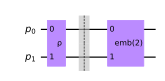

In [31]:
from crsq.blocks.energy_initialization import EnergyConfigBitsPreparationBlock

esb = EnergyConfigBitsPreparationBlock([4,3,2,1])
esb1 = EnergyConfigBitsPreparationBlock([4,3,2,1], build=False)
esb1.invoke(esb.bind(p=esb1._conf_reg))
esb1.circuit.barrier()
esb1.build_circuit()
esb1.circuit.draw('mpl', filename='paper_diagrams/ρ-m1b1d2e1n.png', scale=0.6)

# Demonstration of arithmetics

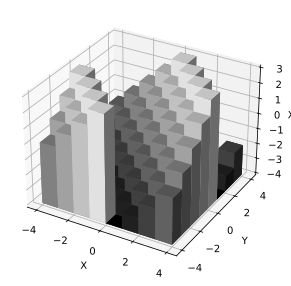

In [32]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.arithmetic.ast as ast
import crsq.utils.statevector as stv
import crsq.heap as heap

m=3
M=2**m
a0reg = QuantumRegister(m, 'a0')
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(a0reg, areg, breg)
gate_frame = heap.Frame(qc)

qc.h(a0reg[:m])
qc.h(breg[:m])

for i in range(a0reg.size):
    qc.cx(a0reg[i], areg[i])


sc = ast.new_scope(gate_frame)

a0 = sc.register(a0reg, signed=True)
a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
a += b

sc.build_circuit()

qc.save_statevector()

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.transforms import Bbox
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
add_results = stv.extract_arithmetic_result_2d_bars(gate_frame, sv, a0, b, a)
(y, x, z, dz) = add_results

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=-60)
ax.set(xlabel='X',ylabel='Y',zlabel='X+Y')
viridis = mpl.colormaps['gray'].resampled(8)
colors = [viridis(q/8) for q in dz]
ax.bar3d(x, y, z, 1, 1, dz, shade=True, color=colors, zsort='min')
# ax.bar3d(x, y, z, 1, 1, dz, shade=True)
plt.savefig('paper_diagrams/arithmetic-sadder3d.png', bbox_inches=Bbox.from_bounds(1.2, 0.4, 4.7, 3.7))
plt.show()


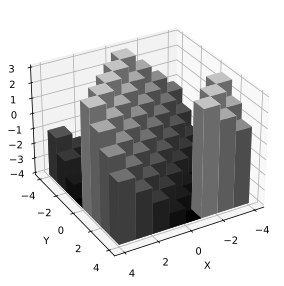

In [33]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.arithmetic.ast as ast
import crsq.utils.statevector as stv
import crsq.heap as heap

m=3
M=2**m
a0reg = QuantumRegister(m, 'a0')
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(a0reg, areg, breg)
gate_frame = heap.Frame(qc)

qc.h(a0reg[:m])
qc.h(breg[:m])

for i in range(a0reg.size):
    qc.cx(a0reg[i], areg[i])


sc = ast.new_scope(gate_frame)

a0 = sc.register(a0reg, signed=True)
a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
a -= b

sc.build_circuit()

qc.save_statevector()

#qc.draw(scale=0.6)
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
subtract_results = stv.extract_arithmetic_result_2d_bars(gate_frame, sv, a0, b, a)
(x, y, z, dz) = subtract_results

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=60)
ax.set(xlabel='X',ylabel='Y',zlabel='X-Y')

viridis = mpl.colormaps['gray'].resampled(8)
colors = [viridis(q/8) for q in dz]
ax.bar3d(x, y, z, 1, 1, dz, shade=True, color=colors, zsort='min')

#ax.bar3d(x, y, z, 1, 1, dz, shade=True)
plt.savefig('paper_diagrams/arithmetic-ssub3d.png', bbox_inches=Bbox.from_bounds(0.7, 0.4, 4.7, 3.7))
plt.show()


/tmp/ipykernel_16648/3344576596.py:27: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(filename)
/home/hideo-t/work/py/crsq/crsq-papers/2023/.env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/home/hideo-t/work/py/crsq/crsq-papers/2023/.env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


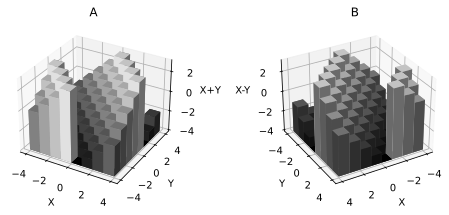

In [34]:
w=5
h=3
u=1/w
v=1/h
fig = plt.figure(figsize=(6.5,3), dpi=100, layout="constrained")

axs[0] = fig.add_axes((0*u,0.2*v,2.4*u,2.4*v), projection='3d')
axs[1] = fig.add_axes((2.8*u,0.2*v,2.4*u,2.4*v), projection='3d')

viridis = mpl.colormaps['gray'].resampled(8)
colors = [viridis(q/8) for q in dz]

(y, x, z, dz) = add_results
axs[0].view_init(elev=30, azim=-60)
axs[0].set(xlabel='X',ylabel='Y',zlabel='X+Y')
axs[0].set_title('A')
axs[0].bar3d(x, y, z, 1, 1, dz, shade=True, color=colors, zsort='min')
# ax.bar3d(x, y, z, 1, 1, dz, shade=True)

(x, y, z, dz) = subtract_results
axs[1].view_init(elev=30, azim=60)
axs[1].set(xlabel='X',ylabel='Y',zlabel='X-Y')
axs[1].set_title('B')
axs[1].bar3d(x, y, z, 1, 1, dz, shade=True, color=colors, zsort='min')

filename="paper_diagrams/arithmetic-sadd-ssub3d.png"
fig.savefig(filename)

QuantumRegister(4, 'b')
x [0, 1, 2, 3, 4, 5, 6, 7, -1, -2, -3, -4, -5, -6, -7, -8]
y [0, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8]


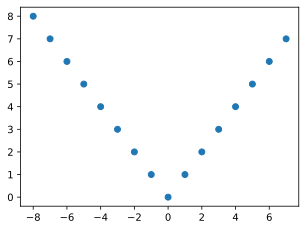

In [35]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.arithmetic.ast as ast
import crsq.utils.statevector as stv
import crsq.heap as heap

areg = QuantumRegister(4, 'a')
breg = QuantumRegister(4, 'b')
qc = QuantumCircuit(areg, breg)
gate_frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(gate_frame)

a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
c = sc.abs(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
abs_result = stv.extract_arithmetic_result_1d_scatter(gate_frame, sv, a, c)
(x,y) = abs_result

print("x", x)
print("y", y)
fig, ax = plt.subplots(figsize=(5,3.6))

ax.scatter(x,y)
plt.savefig('paper_diagrams/arithmetic-abs2d.png')
plt.show()

QuantumRegister(8, 'square0')
x [0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, -8]
y [0, 1, 1, 4, 4, 9, 9, 16, 16, 25, 25, 36, 36, 49, 49, 64]


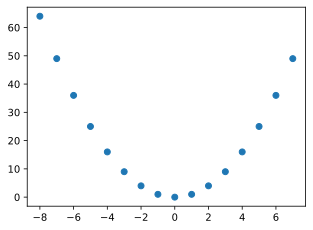

In [36]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.arithmetic.ast as ast
import crsq.utils.statevector as stv
import crsq.heap as heap

areg = QuantumRegister(4, 'a')
breg = QuantumRegister(4, 'b')
qc = QuantumCircuit(areg, breg)
gate_frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(gate_frame)

a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
c = sc.square(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

#qc.draw(scale=0.4)

import matplotlib.pyplot as plt
import numpy as np

backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
square_result = stv.extract_arithmetic_result_1d_scatter(gate_frame, sv, a, c)
(x,y) = square_result

print("x", x)
print("y", y)
fig, ax = plt.subplots(figsize=(5,3.6))

ax.scatter(x,y)
plt.savefig('paper_diagrams/arithmetic-square2d.png')
plt.show()

QuantumRegister(3, 'sqrt0')
x [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
y [0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


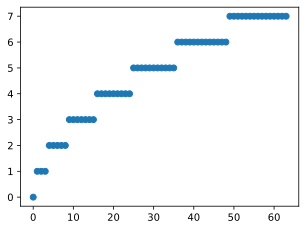

In [37]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.arithmetic.ast as ast
import crsq.utils.statevector as stv
import crsq.heap as heap

m = 6

areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(areg, breg)
gate_frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(gate_frame)

a = sc.register(areg, signed=False, fraction_bits=0)
b = sc.register(breg, signed=False, fraction_bits=0)
c = sc.square_root(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

#qc.draw(scale=0.4)

import matplotlib.pyplot as plt
import numpy as np

backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
sqrt_result = stv.extract_arithmetic_result_1d_scatter(gate_frame, sv, a, c)
(x,y) = sqrt_result

print("x", x)
print("y", y)
fig, ax = plt.subplots(figsize=(5,3.6))

ax.scatter(x,y)
plt.savefig('paper_diagrams/arithmetic-sqrt2d.png')
plt.show()


x [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
y [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 5, 8, 16, 31]


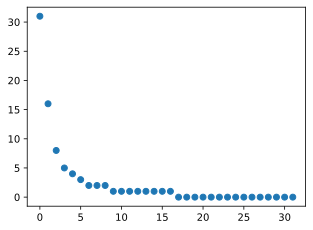

In [38]:
m = 5
n = 5
areg = QuantumRegister(n, 'a')
breg = QuantumRegister(n, 'b')
creg = QuantumRegister(m, 'c')
qc = QuantumCircuit(areg, breg, creg)

qc.h(areg[:areg.size])
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

qc.x(creg[creg.size - 1])

sc = ast.new_scope(qc)

#b = sc.register(breg, fraction_bits=1)
#c = sc.register(creg, fraction_bits=creg.size-1)
b = sc.register(breg, fraction_bits=0)
c = sc.register(creg, fraction_bits=0)
d = c / b

sc.build_circuit()

qc.save_statevector()

# print(d.register)


tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
div_result = stv.extract_arithmetic_result_1d_scatter(qc, sv, b, d)
(x,y) = div_result

print("x", x)
print("y", y)
fig, ax = plt.subplots(figsize=(5,3.6))

ax.scatter(x,y)

plt.savefig('paper_diagrams/arithmetic-reciprocal.png')


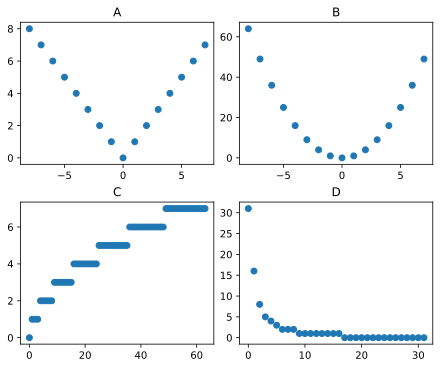

In [39]:
results = [abs_result, square_result, sqrt_result, div_result]

fig, axs = plt.subplots(2, 2, dpi=300, figsize=(6,5), layout='constrained')

for row in [0,1]:
    for col in [0,1]:
        ind = row*2+col
        label = 'ABCD'[ind]
        result = results[ind]
        (x,y) = result
        axs[row][col].scatter(x,y)
        axs[row][col].set_title(label)

filename='paper_diagrams/arithmetic-plots.png'
fig.savefig(filename)

# Testing state preparation

## testing the set value gate

  R,amplitude
000, 0.166667
001, 0.235702
010, 0.288675
011, 0.333333
100, 0.372678
101, 0.408248
110, 0.440959
111, 0.471405


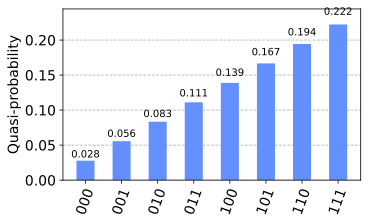

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
import crsq.utils.setdistribution as sdist

from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import crsq.utils.amplitudes as amplitudes
import crsq.utils.statevector as svec

qr = QuantumRegister(3, "R")
qc = QuantumCircuit(qr)
pn = [1,2,3,4,5,6,7,8] # unnormalized probabilities
an = [np.sqrt(p) for p in pn]
cn = np.array(an)
sdist.setdist(qc, qr, cn)
qc.save_statevector()

backend = AerSimulator(method='automatic')

transpiled = transpile(qc, backend)
result = backend.run(transpiled, shots=100*len(cn)).result()
sv = result.get_statevector()
counts = result.get_counts()

svec.dump_statevector(sv, qc)

dpi=300
qstyle={'name': 'default', 'dpi': dpi, 'fontsize': 13, 'subfontsize': 8}

fig, ax = plt.subplots(layout='constrained',dpi=dpi, figsize=(5,3))
plot_histogram(counts, ax=ax) # ax=ax,, figsize=(5,3)
filename="paper_diagrams/test-setd.png"
fig.savefig(filename)



## testing the shuffle gate

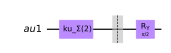

In [41]:
from crsq.blocks.antisymmetrization import UnaryCodedSequenceBlock
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile
backend = AerSimulator()

c = []
p = []
for eta in range(2,6):
    lcb = UnaryCodedSequenceBlock(eta)
    lcb1 = UnaryCodedSequenceBlock(eta, build=False)
    lcb1.invoke(lcb.bind(areg=lcb1._areg))
    lcb1.circuit.barrier()
    lcb1.build_circuit()
    p.append(lcb1.circuit.draw(scale=0.6))
    lcb.circuit.measure_all()
    transpiled = transpile(lcb.circuit, backend)
    result = backend.run(transpiled).result()
    counts = result.get_counts()
    c.append(plot_histogram(counts))

p[0]

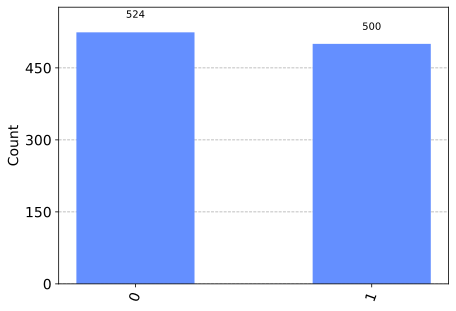

In [42]:
c[0]

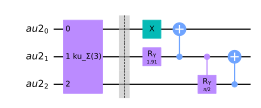

In [43]:
p[1]

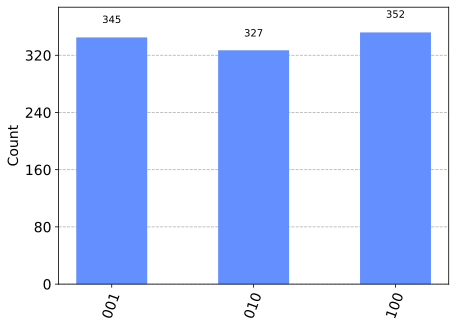

In [44]:
c[1]

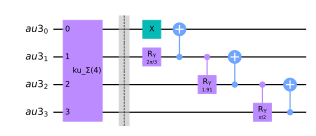

In [45]:
p[2]

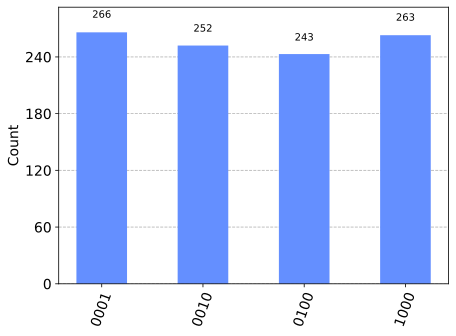

In [46]:
c[2]

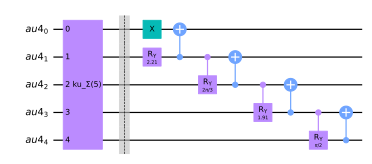

In [47]:
p[3]

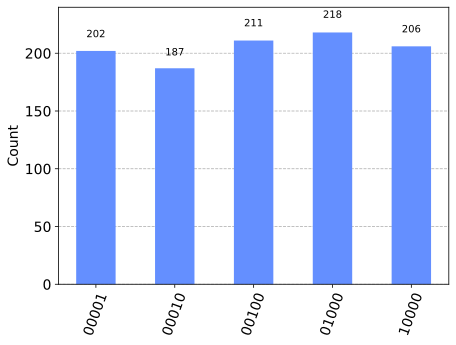

In [48]:
c[3]

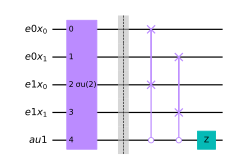

In [49]:
from crsq.blocks.wave_function import WaveFunctionRegisterSpec
from crsq.blocks.antisymmetrization import UnaryCodedShuffleBlock
wfrspec=WaveFunctionRegisterSpec(1,2,L,4,0,0)
n=wfrspec.num_coordinate_bits
Ne=wfrspec.num_electrons
eta=2
ush = UnaryCodedShuffleBlock(wfrspec, eta, build=False)
ush2 = UnaryCodedShuffleBlock(wfrspec, eta)
ush.invoke(ush2.bind(areg=ush._areg, eregs=ush._eregs))
ush.circuit.barrier()
ush.build_circuit()
ush.circuit.draw(scale=0.6)

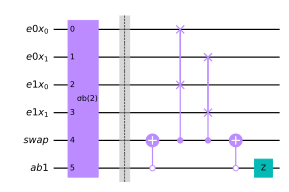

In [50]:
from crsq.blocks.antisymmetrization import BinaryCodedShuffleBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec

wfr_spec = WaveFunctionRegisterSpec(1, 2, L, 4, 0, 0)
bscircs = []
for eta in range(2,5):
    blcb2 = BinaryCodedShuffleBlock(wfr_spec, eta)
    blcb = BinaryCodedShuffleBlock(wfr_spec, eta, build=False)
    blcb.invoke(blcb2.bind(areg=blcb._areg, swap=blcb._swap_ancilla_reg, eregs=blcb._eregs))
    blcb.circuit.barrier()
    blcb.build_circuit()
    bscircs.append(blcb.circuit.draw(scale=0.6))

bscircs[0]

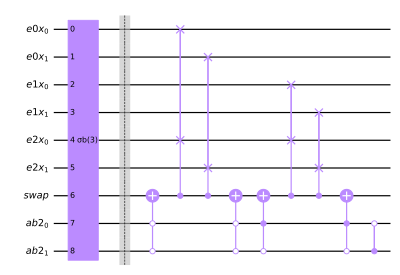

In [51]:
bscircs[1]

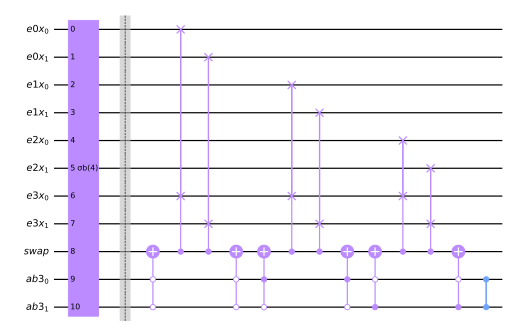

In [52]:
bscircs[2]

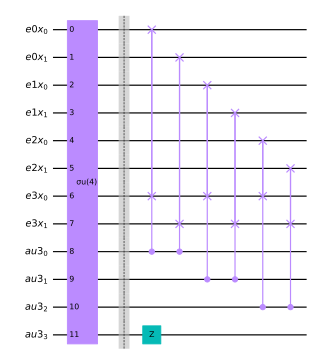

In [53]:
from crsq.blocks.antisymmetrization import UnaryCodedShuffleBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec

wfr_spec = WaveFunctionRegisterSpec(1, 2, L, 4, 0, 0)
eta=4
ulcb1 = UnaryCodedShuffleBlock(wfr_spec, eta, build=False)
ulcb2 = UnaryCodedShuffleBlock(wfr_spec, eta)
ulcb1.invoke(ulcb2.bind(areg=ulcb1._areg, eregs=ulcb1._eregs))
ulcb1.circuit.barrier()
ulcb1.build_circuit()
ulcb1.circuit.draw(scale=0.6)


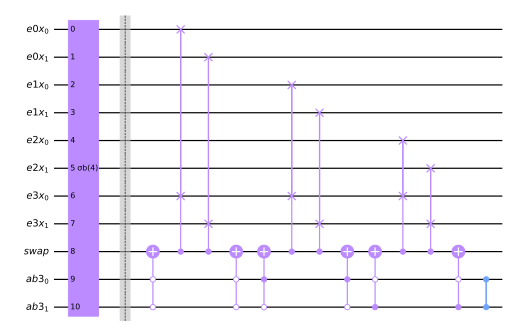

In [54]:
from crsq.blocks.antisymmetrization import BinaryCodedShuffleBlock
from crsq.blocks.wave_function import WaveFunctionRegisterSpec

wfr_spec = WaveFunctionRegisterSpec(1, 2, L, 4, 0, 0)
eta=4
blcb2 = BinaryCodedShuffleBlock(wfr_spec, eta)
blcb1 = BinaryCodedShuffleBlock(wfr_spec, eta, build=False)
blcb1.invoke(blcb2.bind(areg=blcb1._areg, swap=blcb1._swap_ancilla_reg, eregs=blcb1._eregs))
blcb1.circuit.barrier()
blcb1.build_circuit()
blcb1.circuit.draw(scale=0.6)


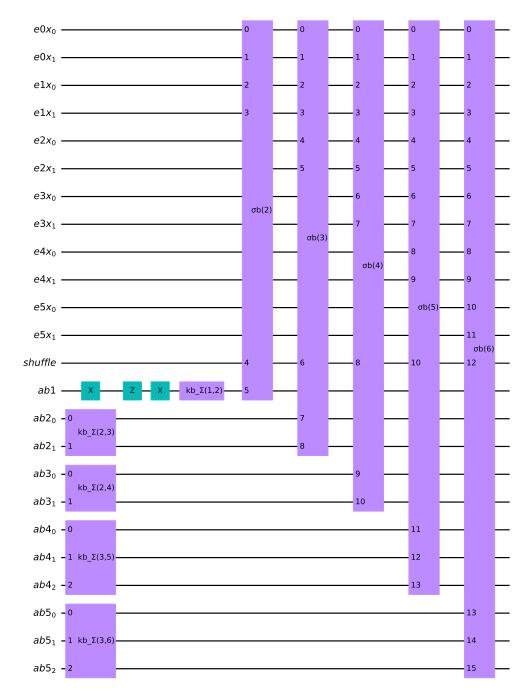

In [55]:
from crsq.blocks.antisymmetrization import BinaryCodedPermutationBlock, AntisymmetrizationSpec
from crsq.blocks.wave_function import WaveFunctionRegisterSpec

wfr_spec = WaveFunctionRegisterSpec(1, 2, L, 6, 0, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 3)
hfs = BinaryCodedPermutationBlock(asy_spec)
hfs.circuit.draw(scale=0.6)